In [2]:
import pandas as pd
from fbprophet import Prophet

In [4]:
df = pd.read_csv('example_wp_log_peyton_manning.csv')
df.head()


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
m = Prophet()
m.fit(df)

C:\Users\v9022828\AppData\Local\conda\conda\envs\CodeML\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\v9022828\AppData\Local\conda\conda\envs\CodeML\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203217,7.447090,8.914854
3266,2017-01-16,8.528203,7.726235,9.244039
3267,2017-01-17,8.315601,7.593566,9.007441
3268,2017-01-18,8.148207,7.425999,8.847722
3269,2017-01-19,8.160103,7.438062,8.834111


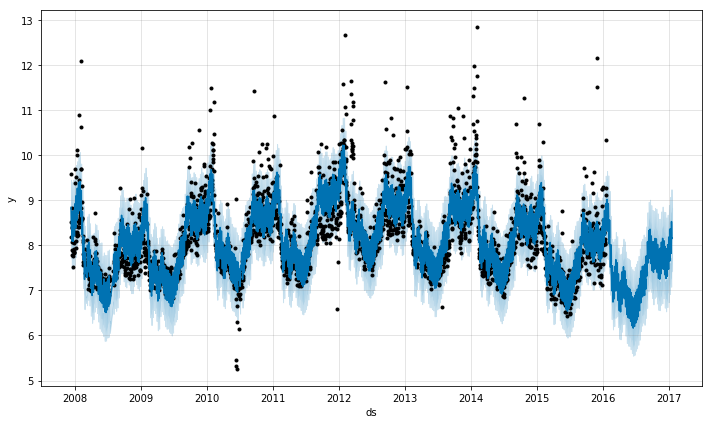

In [6]:
fig1 = m.plot(forecast)

In [16]:
signals=df['y'].values
signals

array([ 9.59076114,  8.51959032,  8.18367658, ..., 10.33377535,
        9.12587122,  8.89137401])

In [32]:
import ruptures as rpt
import matplotlib.pyplot as plt
#n_samples,dim=1000,1
#n_bkps=2

In [35]:
algo = rpt.Pelt(model="rbf").fit(signals)
result = algo.predict(pen=15)

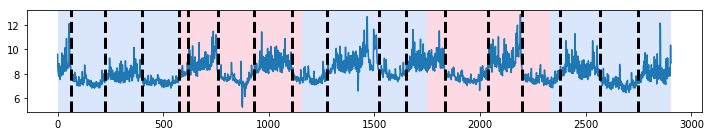

In [36]:
rpt.display(signals,bkps,result)
plt.show()